In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm




In [2]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)

  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

  pos_encoding = angle_rads[np.newaxis, ...]

  return pos_encoding.astype(np.float32)

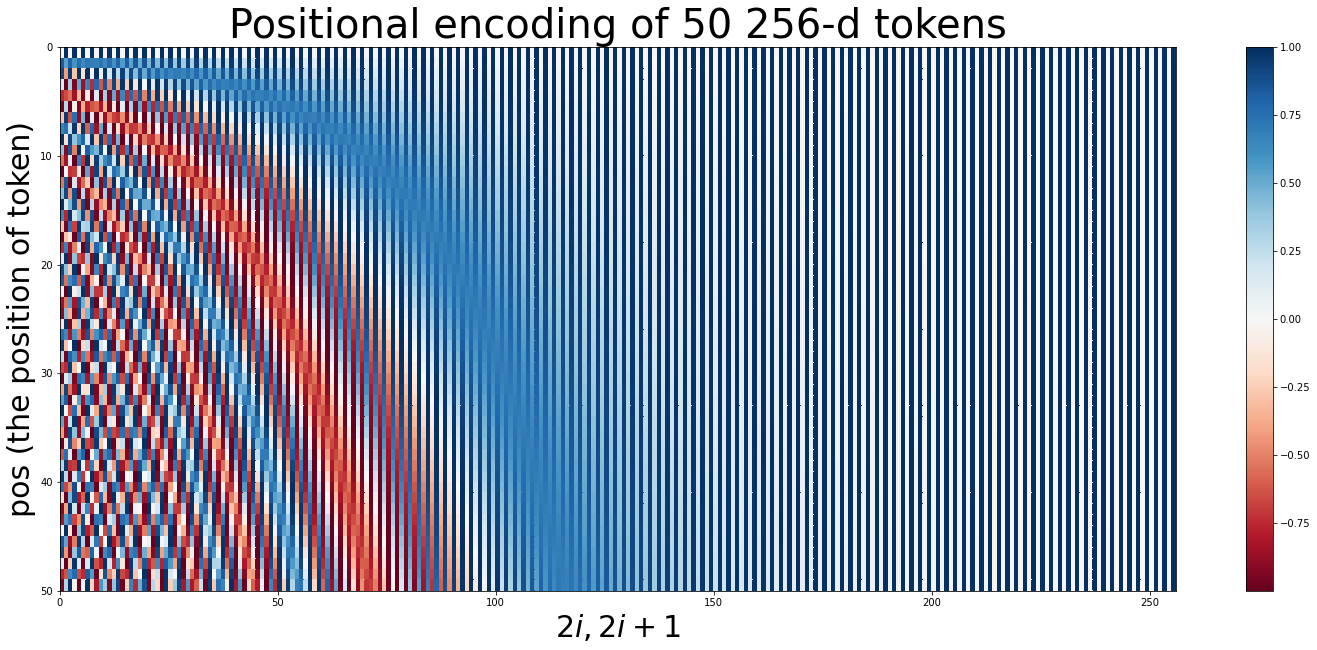

In [3]:


resolution = 50
d_model = 256

n, d = resolution, d_model
pos_encoding = positional_encoding(n, d)
pos_encoding = pos_encoding[0]

plt.figure(figsize=(25, 10))
plt.pcolormesh(pos_encoding, cmap='RdBu')
plt.gca().invert_yaxis()
plt.ylabel('pos (the position of token)', fontsize=30)
plt.xlabel('$2i, 2i+1$', fontsize=30)
plt.colorbar()
plt.title("Positional encoding of 50 256-d tokens", fontsize=40)
plt.savefig("positional_encoding_heat_map.png")
plt.show()

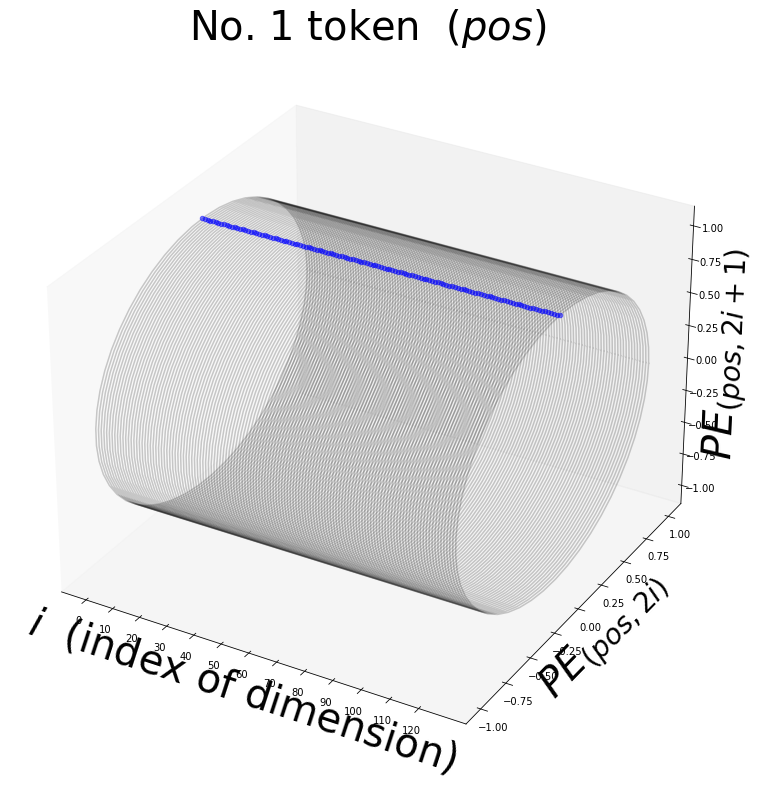

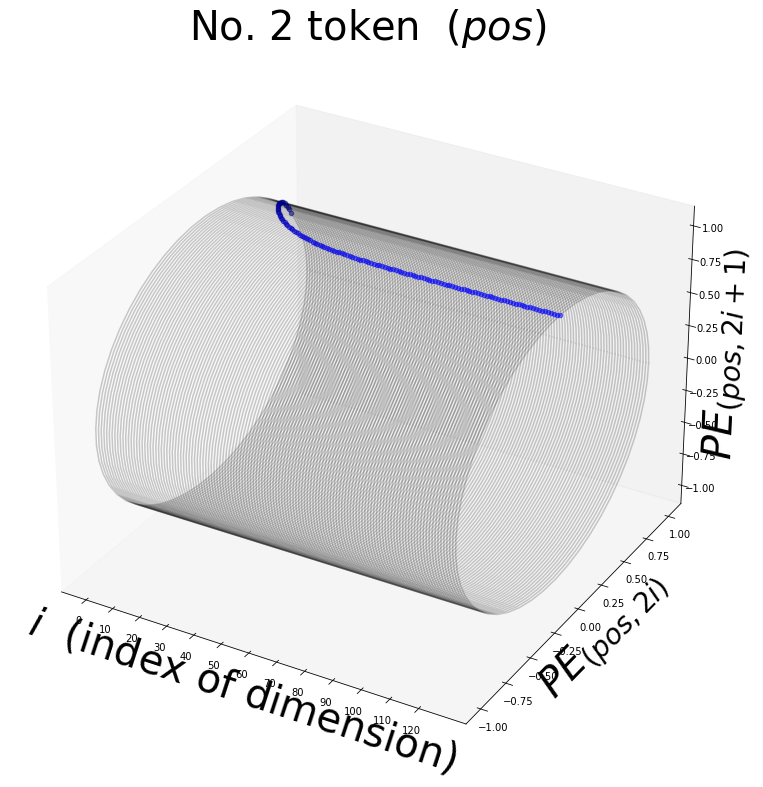

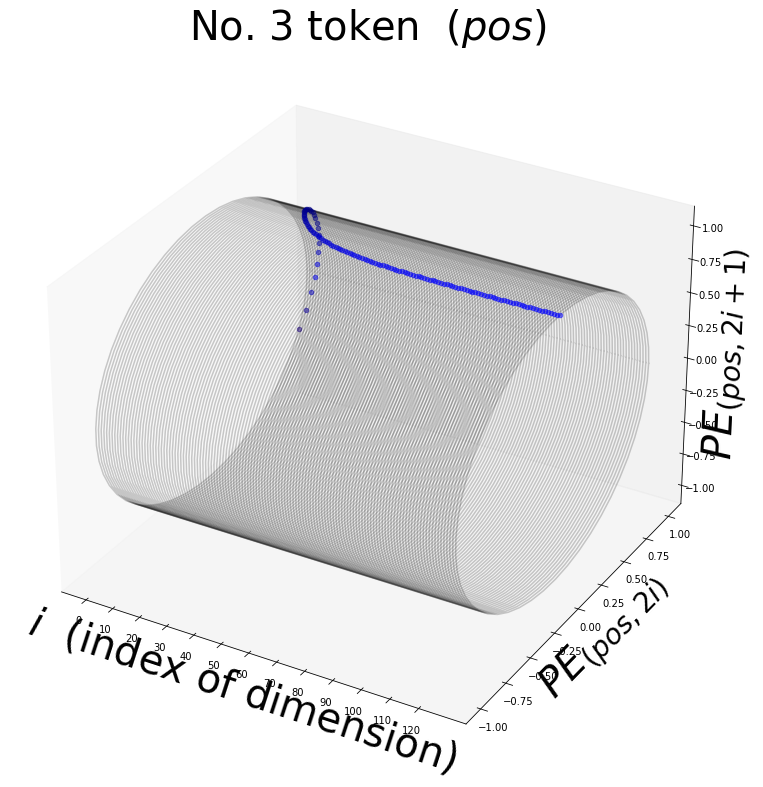

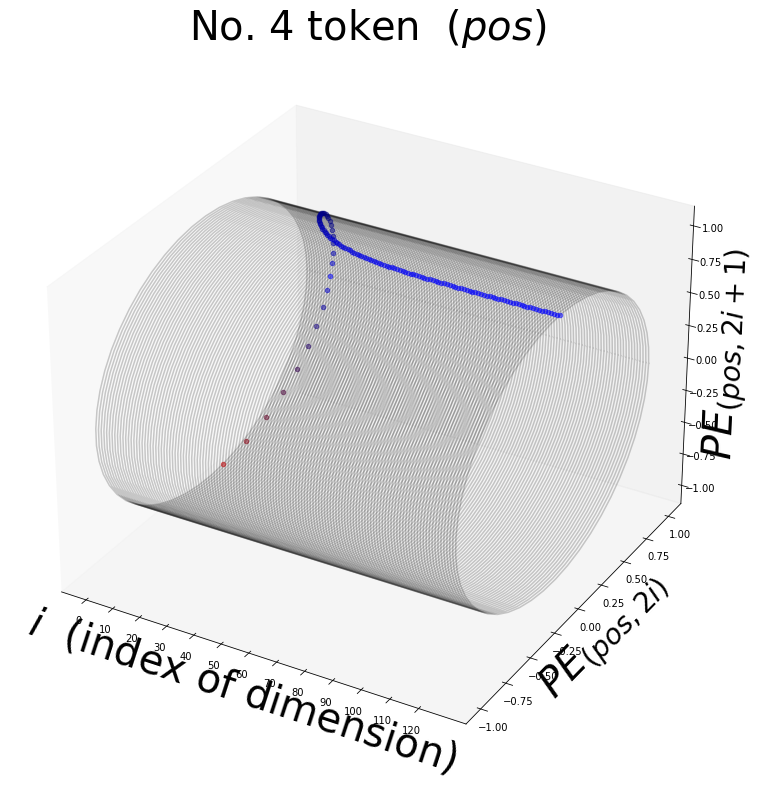

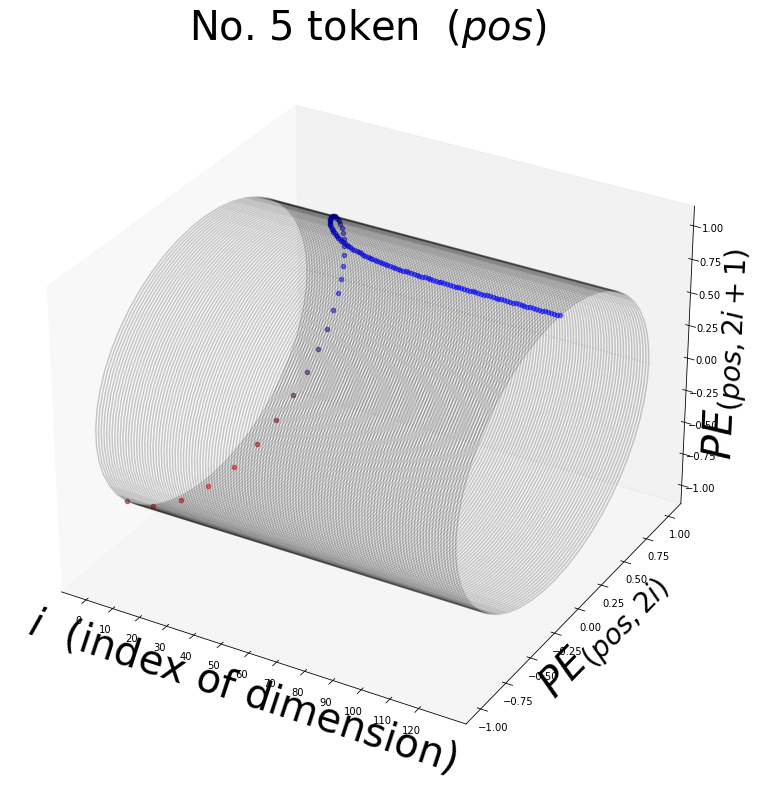

In [4]:
# A function to mix blue and red colors. 
def blue_red_gradation(x, y):
    red = np.array([1.0, 0.0, 0.0])
    blue = np.array([0.0, 0.0, 1.0])
    combined_color_x = (max(0, x)*blue + abs(min(x, 0))*red)/(abs(x) + abs(y))
    combined_color_y = (max(0, y)*blue + abs(min(y, 0))*red)/(abs(x) + abs(y))
    combined_color = (combined_color_x*abs(x) + combined_color_y*abs(y))/(abs(x) + abs(y))
    return combined_color[np.newaxis, ...]


resolution = 50
d_model = 256
x_range = 512
x_coordinates = np.linspace(0, d_model//2 - 1, d_model//2)
radius = 1
angular_velocity = np.pi / 12
y_coordinates = radius*np.cos(np.linspace(0, 1, resolution)*2*np.pi)
z_coordinates = radius*np.sin(np.linspace(0, 1, resolution)*2*np.pi)


n, d = resolution, d_model
pos_encoding = positional_encoding(n, d)
pos_encoding = pos_encoding[0]


#ax = fig.add_subplot(1, 1, 1, projection='3d')
color_vec = [[1., 0., 1.]]

markersize = 1
#for j in range(resolution):
for j in range(5):
    fig = plt.figure(figsize=(25, 10))
    ax = fig.gca(projection='3d')
    for i in range(d_model//2):
        ax.plot(x_coordinates[i]*np.ones(len(y_coordinates)), y_coordinates, z_coordinates, c='black', alpha=0.2)
    
    
    for i in range(len(x_coordinates)):
        ax.scatter(x_coordinates[i], radius*pos_encoding[:, 0::2][j, i], radius*pos_encoding[:, 1::2][j, i], 
                   c=blue_red_gradation(pos_encoding[:, 0::2][j, i], pos_encoding[:, 1::2][j, i]), alpha=0.5, s=20)
        ax.grid(False)

    ax.set_title(r'No. {} token  ($pos$)'.format(j+1), fontsize=40)
    ax.set_xlabel(r"$i$  (index of dimension)", fontsize=40)
    ax.set_ylabel(r'$PE_{(pos, 2i)}$', fontsize=40)
    ax.set_zlabel(r'$PE_{(pos, 2i+1)}$', fontsize=40)
    ax.set_xticks(np.arange(0, d_model//2, 10))
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    #plt.savefig('./positional_encoding_gif/{}.png'.format(j+1))
    plt.show()